In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pd.get_option("display.max_columns")
pd.set_option("display.max_columns", None)
pd.options.mode.chained_assignment = None

In [3]:
url = 'https://fantasy.premierleague.com/api/bootstrap-static/'

In [4]:
r = requests.get(url)

In [5]:
json = r.json()

In [6]:
json['elements']

[{'chance_of_playing_next_round': None,
  'chance_of_playing_this_round': None,
  'code': 84450,
  'cost_change_event': 0,
  'cost_change_event_fall': 0,
  'cost_change_start': -1,
  'cost_change_start_fall': 1,
  'dreamteam_count': 1,
  'element_type': 3,
  'ep_next': '3.3',
  'ep_this': '5.6',
  'event_points': 4,
  'first_name': 'Granit',
  'form': '2.8',
  'id': 3,
  'in_dreamteam': False,
  'news': '',
  'news_added': None,
  'now_cost': 49,
  'photo': '84450.jpg',
  'points_per_game': '3.9',
  'second_name': 'Xhaka',
  'selected_by_percent': '2.8',
  'special': False,
  'squad_number': None,
  'status': 'a',
  'team': 1,
  'team_code': 3,
  'total_points': 85,
  'transfers_in': 826562,
  'transfers_in_event': 1920,
  'transfers_out': 699323,
  'transfers_out_event': 6335,
  'value_form': '0.6',
  'value_season': '17.3',
  'web_name': 'Xhaka',
  'minutes': 1868,
  'goals_scored': 3,
  'assists': 5,
  'clean_sheets': 8,
  'goals_conceded': 21,
  'own_goals': 0,
  'penalties_saved':

In [7]:
json.keys()

dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])

In [8]:
elements_df = pd.DataFrame(json['elements'])
elements_types_df = pd.DataFrame(json['element_types'])
teams_df = pd.DataFrame(json['teams'])

In [9]:
teams_df.head()

,code,draw,form,id,loss,name,played,points,position,short_name,strength,team_division,unavailable,win,strength_overall_home,strength_overall_away,strength_attack_home,strength_attack_away,strength_defence_home,strength_defence_away,pulse_id
0,3,0,None,1,0,Arsenal,0,0,0,ARS,4,None,False,0,1245,1285,1250,1250,1240,1320,1
1,7,0,None,2,0,Aston Villa,0,0,0,AVL,3,None,False,0,1070,1100,1070,1075,1070,1130,2
2,91,0,None,3,0,Bournemouth,0,0,0,BOU,2,None,False,0,1035,1095,1020,1110,1050,1080,127
3,94,0,None,4,0,Brentford,0,0,0,BRE,3,None,False,0,1115,1180,1100,1160,1130,1200,130
4,36,0,None,5,0,Brighton,0,0,0,BHA,3,None,False,0,1170,1175,1140,1150,1200,1200,131


In [10]:
elements_df.head()

,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,ep_this,event_points,first_name,form,id,in_dreamteam,news,news_added,now_cost,photo,points_per_game,second_name,selected_by_percent,special,squad_number,status,team,team_code,total_points,transfers_in,transfers_in_event,transfers_out,transfers_out_event,value_form,value_season,web_name,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,starts,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,influence_rank,influence_rank_type,creativity_rank,creativity_rank_type,threat_rank,threat_rank_type,ict_index_rank,ict_index_rank_type,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,direct_freekicks_order,direct_freekicks_text,penalties_order,penalties_text,expected_goals_per_90,saves_per_90,expected_assists_per_90,expected_goal_involvements_per_90,expected_goals_conceded_per_90,goals_conceded_per_90,now_cost_rank,now_cost_rank_type,form_rank,form_rank_type,points_per_game_rank,points_per_game_rank_type,selected_rank,selected_rank_type,starts_per_90,clean_sheets_per_90
0,NaN,NaN,84450,0,0,-1,1,1,3,3.3,5.6,4,Granit,2.8,3,False,,None,49,84450.jpg,3.9,Xhaka,2.8,False,None,a,1,3,85,826562,1920,699323,6335,0.6,17.3,Xhaka,1868,3,5,8,21,0,0,0,3,0,0,7,371,430.2,496.9,328.0,125.6,22,2.14,2.93,5.07,21.97,47,18,16,12,61,39,31,22,NaN,,3.0,,NaN,,0.10,0.0,0.14,0.24,1.06,1.01,239,138,105,42,67,31,100,33,1.06,0.39
1,0.0,0.0,153256,0,0,-4,4,1,3,0.0,0.0,0,Mohamed,0.0,4,False,Knee injury - Unknown return date,2023-01-26T10:00:07.778526Z,41,153256.jpg,1.2,Elneny,0.7,False,None,i,1,3,6,196864,340,263337,1780,0.0,1.5,Elneny,111,0,0,0,2,0,0,0,0,0,0,0,27,4.6,5.4,0.0,1.1,1,0.00,0.04,0.04,1.29,470,215,425,209,549,220,474,218,NaN,,NaN,,NaN,,0.00,0.0,0.03,0.03,1.05,1.62,624,321,493,182,401,176,218,68,0.81,0.00
2,NaN,NaN,156074,0,0,-3,3,0,2,0.7,0.4,0,Rob,0.2,5,False,,None,42,156074.jpg,1.0,Holding,0.1,False,None,a,1,3,6,6962,35,17986,76,0.0,1.4,Holding,16,0,0,0,0,0,0,0,0,0,0,0,20,3.4,0.1,0.0,0.3,0,0.00,0.00,0.00,0.28,478,170,486,176,556,221,497,175,NaN,,NaN,,NaN,,0.00,0.0,0.00,0.00,1.58,0.00,597,169,379,130,436,162,433,162,0.00,0.00
3,75.0,100.0,167199,0,0,-3,3,0,3,1.5,3.0,3,Thomas,1.5,6,False,Muscle injury - 75% chance of playing,2023-02-15T22:30:09.735511Z,47,167199.jpg,3.2,Partey,0.5,False,None,d,1,3,57,99223,732,126297,833,0.3,12.1,Partey,1540,2,0,9,11,0,0,0,2,0,0,5,286,342.8,293.1,172.0,80.9,18,1.63,0.95,2.59,17.46,90,38,61,51,141,89,87,60,NaN,,NaN,,NaN,,0.10,0.0,0.06,0.15,1.02,0.64,314,191,214,94,133,63,262,85,1.05,0.53
4,100.0,100.0,184029,0,0,5,-5,4,3,3.3,5.6,4,Martin,2.8,7,True,,2022-09-18T20:00:06.315087Z,70,184029.jpg,5.9,Ødegaard,37.4,False,None,a,1,3,123,5001303,47097,2547904,52787,0.4,17.6,Ødegaard,1778,8,6,8,20,0,0,0,3,0,0,18,464,537.0,653.7,592.0,178.5,21,5.68,4.77,10.49,21.40,17,7,7,6,22,13,9,7,3.0,,1.0,,NaN,,0.29,0.0,0.24,0.53,1.08,1.01,41,20,108,44,9,4,5,2,1.06,0.40


In [11]:
elements_df.columns

Index(['chance_of_playing_next_round', 'chance_of_playing_this_round', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'dreamteam_count', 'element_type', 'ep_next',
       'ep_this', 'event_points', 'first_name', 'form', 'id', 'in_dreamteam',
       'news', 'news_added', 'now_cost', 'photo', 'points_per_game',
       'second_name', 'selected_by_percent', 'special', 'squad_number',
       'status', 'team', 'team_code', 'total_points', 'transfers_in',
       'transfers_in_event', 'transfers_out', 'transfers_out_event',
       'value_form', 'value_season', 'web_name', 'minutes', 'goals_scored',
       'assists', 'clean_sheets', 'goals_conceded', 'own_goals',
       'penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards',
       'saves', 'bonus', 'bps', 'influence', 'creativity', 'threat',
       'ict_index', 'starts', 'expected_goals', 'expected_assists',
       'expected_goal_involvements', 'expected_goals_con

In [922]:
slim_elements_df = elements_df[['id','first_name','second_name','team','element_type'
                                ,'selected_by_percent','now_cost','minutes','transfers_in'
                                ,'value_season','total_points'
                               , 'influence','creativity','threat']]
slim_elements_df.head()

,id,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,influence,creativity,threat
0,3,Granit,Xhaka,1,3,2.8,49,1868,826562,17.3,85,430.2,496.9,328.0
1,4,Mohamed,Elneny,1,3,0.7,41,111,196864,1.5,6,4.6,5.4,0.0
2,5,Rob,Holding,1,2,0.1,42,16,6962,1.4,6,3.4,0.1,0.0
3,6,Thomas,Partey,1,3,0.5,47,1540,99223,12.1,57,342.8,293.1,172.0
4,7,Martin,Ødegaard,1,3,37.4,70,1778,5001303,17.6,123,537.0,653.7,592.0


In [923]:
slim_elements_df['position'] = slim_elements_df.element_type.map(elements_types_df.set_index('id').singular_name)
slim_elements_df['team_name'] = slim_elements_df.team.map(teams_df.set_index('id').name)

In [924]:
slim_elements_df

,id,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,influence,creativity,threat,position,team_name
0,3,Granit,Xhaka,1,3,2.8,49,1868,826562,17.3,85,430.2,496.9,328.0,Midfielder,Arsenal
1,4,Mohamed,Elneny,1,3,0.7,41,111,196864,1.5,6,4.6,5.4,0.0,Midfielder,Arsenal
2,5,Rob,Holding,1,2,0.1,42,16,6962,1.4,6,3.4,0.1,0.0,Defender,Arsenal
3,6,Thomas,Partey,1,3,0.5,47,1540,99223,12.1,57,342.8,293.1,172.0,Midfielder,Arsenal
4,7,Martin,Ødegaard,1,3,37.4,70,1778,5001303,17.6,123,537.0,653.7,592.0,Midfielder,Arsenal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,682,Matheus,Santos Carneiro Da Cunha,20,4,0.1,55,249,21028,1.1,6,23.2,25.7,40.0,Forward,Wolves
741,698,Mario,Lemina,20,3,0.0,45,191,315,0.7,3,27.4,19.6,2.0,Midfielder,Wolves
742,704,Pablo,Sarabia,20,3,0.1,55,194,6956,0.7,4,5.2,19.1,22.0,Midfielder,Wolves
743,717,Daniel,Bentley,20,1,0.0,40,0,706,0.0,0,0.0,0.0,0.0,Goalkeeper,Wolves


In [925]:
slim_elements_df['value'] = slim_elements_df.value_season.astype(float)
slim_elements_df['selected_by_percent'] = slim_elements_df.selected_by_percent.astype(float)

In [926]:
slim_elements_df.sort_values('selected_by_percent',ascending=False).head(20)

,id,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,influence,creativity,threat,position,team_name,value
470,318,Erling,Haaland,13,4,85.4,122,1770,5565537,14.8,181,978.4,227.0,1285.0,Forward,Man City,14.8
529,357,Kieran,Trippier,15,2,69.7,61,1954,6523985,23.8,145,569.4,1107.9,81.0,Defender,Newcastle,23.8
494,335,Marcus,Rashford,14,3,54.2,73,1886,7570722,18.6,136,587.6,291.0,906.0,Midfielder,Man Utd,18.6
645,427,Harry,Kane,18,4,38.0,118,2056,5265599,12.7,150,779.2,489.0,1260.0,Forward,Spurs,12.7
4,7,Martin,Ødegaard,1,3,37.4,70,1778,5001303,17.6,123,537.0,653.7,592.0,Midfielder,Arsenal,17.6
15,19,Gabriel,Martinelli Silva,1,3,36.6,66,1803,5689976,16.4,108,434.0,524.9,835.0,Midfielder,Arsenal,16.4
455,301,Kevin,De Bruyne,13,3,35.9,124,1773,5985857,9.9,123,625.6,1074.6,482.0,Midfielder,Man City,9.9
21,26,William,Saliba,1,2,35.3,53,1965,5216587,18.1,96,432.6,67.6,103.0,Defender,Arsenal,18.1
10,13,Bukayo,Saka,1,3,31.4,83,1894,4169822,15.2,126,608.8,713.1,687.0,Midfielder,Arsenal,15.2
541,369,Miguel,Almirón Rejala,15,3,30.3,56,1816,5561810,22.1,124,506.2,282.3,679.0,Midfielder,Newcastle,22.1


In [927]:
slim_elements_df = slim_elements_df.loc[slim_elements_df.value > 0]

In [928]:
pivot = slim_elements_df.pivot_table(index='position',values='value',aggfunc=np.mean).reset_index()
pivot.sort_values('value',ascending=False)

,position,value
2,Goalkeeper,12.055172
0,Defender,6.847253
3,Midfielder,6.177869
1,Forward,5.392647


In [929]:
team_pivot = slim_elements_df.pivot_table(index='team_name',values='value',aggfunc=np.mean).reset_index()
team_pivot.sort_values('value',ascending=False)

,team_name,value
14,Newcastle,9.856522
0,Arsenal,9.786957
12,Man City,8.347619
3,Brentford,8.128000
4,Brighton,7.734783
13,Man Utd,7.708000
6,Crystal Palace,6.973913
1,Aston Villa,6.904348
8,Fulham,6.868966
10,Leicester,6.734615


In [20]:
fwd_df = slim_elements_df.loc[slim_elements_df.position == 'Forward']
mid_df = slim_elements_df.loc[slim_elements_df.position == 'Midfielder']
def_df = slim_elements_df.loc[slim_elements_df.position == 'Defender']
goal_df = slim_elements_df.loc[slim_elements_df.position == 'Goalkeeper']

In [921]:
goal_df.sort_values('value',ascending=False).head(15)

,id,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,team_name,value
117,81,David,Raya Martin,4,1,9.4,47,1980,1375367,22.1,104,Goalkeeper,Brentford,22.1
548,376,Nick,Pope,15,1,25.6,55,1980,3632396,19.6,108,Goalkeeper,Newcastle,19.6
304,2,Bernd,Leno,9,1,2.5,45,1890,330206,19.1,86,Goalkeeper,Fulham,19.1
348,254,Danny,Ward,10,1,28.5,40,1980,2227865,18.5,74,Goalkeeper,Leicester,18.5
229,152,Vicente,Guaita,7,1,2.0,44,1980,480220,18.2,80,Goalkeeper,Crystal Palace,18.2
486,327,David,De Gea Quintana,14,1,10.3,50,2070,1212257,18.0,90,Goalkeeper,Man Utd,18.0
710,478,José,Malheiro de Sá,20,1,5.1,50,1980,822857,18.0,90,Goalkeeper,Wolves,18.0
12,15,Aaron,Ramsdale,1,1,12.1,49,1980,1335077,17.8,87,Goalkeeper,Arsenal,17.8
579,398,Dean,Henderson,16,1,7.0,46,1620,1417139,17.8,82,Goalkeeper,Nott'm Forest,17.8
158,113,Robert,Sánchez,5,1,11.3,46,1890,1729344,17.2,79,Goalkeeper,Brighton,17.2


In [920]:
def_df.sort_values('total_points',ascending=False).head(15)

,id,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,team_name,value
529,357,Kieran,Trippier,15,2,69.7,61,1954,6523985,23.8,145,Defender,Newcastle,23.8
538,366,Fabian,Schär,15,2,17.3,52,1874,3011468,19.4,101,Defender,Newcastle,19.4
21,26,William,Saliba,1,2,35.3,53,1965,5216587,18.1,96,Defender,Arsenal,18.1
140,526,Ben,Mee,4,2,12.8,49,1838,2026157,19.2,94,Defender,Brentford,19.2
13,16,Gabriel,dos Santos Magalhães,1,2,13.8,52,1980,2015750,17.5,91,Defender,Arsenal,17.5
530,358,Dan,Burn,15,2,4.2,46,1854,608271,19.8,91,Defender,Newcastle,19.8
7,10,Benjamin,White,1,2,13.5,47,1690,2048145,18.9,89,Defender,Arsenal,18.9
549,377,Sven,Botman,15,2,6.2,45,1687,917062,19.6,88,Defender,Newcastle,19.6
491,332,Luke,Shaw,14,2,27.4,53,1593,3418808,15.8,84,Defender,Man Utd,15.8
307,201,Tim,Ream,9,2,2.1,46,2067,322053,17.0,78,Defender,Fulham,17.0


In [918]:
mid_df.sort_values('total_points',ascending=False).head(30)

,id,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,team_name,value
494,335,Marcus,Rashford,14,3,54.2,73,1886,7570722,18.6,136,Midfielder,Man Utd,18.6
10,13,Bukayo,Saka,1,3,31.4,83,1894,4169822,15.2,126,Midfielder,Arsenal,15.2
541,369,Miguel,Almirón Rejala,15,3,30.3,56,1816,5561810,22.1,124,Midfielder,Newcastle,22.1
455,301,Kevin,De Bruyne,13,3,35.9,124,1773,5985857,9.9,123,Midfielder,Man City,9.9
4,7,Martin,Ødegaard,1,3,37.4,70,1778,5001303,17.6,123,Midfielder,Arsenal,17.6
426,283,Mohamed,Salah,12,3,21.7,126,1866,3625834,9.2,116,Midfielder,Liverpool,9.2
15,19,Gabriel,Martinelli Silva,1,3,36.6,66,1803,5689976,16.4,108,Midfielder,Arsenal,16.4
155,107,Solly,March,5,3,6.1,51,1810,1051044,20.2,103,Midfielder,Brighton,20.2
492,333,Bruno,Borges Fernandes,14,3,12.2,99,1979,1992620,10.3,102,Midfielder,Man Utd,10.3
355,261,James,Maddison,10,3,4.3,80,1272,3093407,12.0,96,Midfielder,Leicester,12.0


In [919]:
fwd_df.sort_values('total_points',ascending=False).head(20)

,id,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,team_name,value
470,318,Erling,Haaland,13,4,85.4,122,1770,5565537,14.8,181,Forward,Man City,14.8
645,427,Harry,Kane,18,4,38.0,118,2056,5265599,12.7,150,Forward,Spurs,12.7
116,80,Ivan,Toney,4,4,29.6,76,1791,7987329,15.8,120,Forward,Brentford,15.8
316,210,Aleksandar,Mitrović,9,4,25.8,69,1636,7588949,12.6,87,Forward,Fulham,12.6
44,40,Ollie,Watkins,2,4,2.7,71,1718,742029,12.1,86,Forward,Aston Villa,12.1
131,95,Bryan,Mbeumo,4,4,3.1,58,1657,838080,13.3,77,Forward,Brentford,13.3
575,394,Brennan,Johnson,16,4,2.1,57,1795,380320,13.0,74,Forward,Nott'm Forest,13.0
616,411,Che,Adams,17,4,1.6,62,1574,504327,11.8,73,Forward,Southampton,11.8
528,356,Callum,Wilson,15,4,4.0,71,1127,2435221,9.9,70,Forward,Newcastle,9.9
422,279,Roberto,Firmino,12,4,2.7,80,938,1797071,8.8,70,Forward,Liverpool,8.8


In [930]:
df = []
for j,k in enumerate(range(gameweek_gone)):
        url_gameweek = 'https://fantasy.premierleague.com/api/event/'+str(k+1)+'/live/'
        r = requests.get(url_gameweek)
        data = r.json()
        
        explain = [data['elements'][i]['explain'] for i in range(len(data['elements']))]
        game_count = [len(games) for games in explain]
        player_ids = [ele['id'] for ele in data['elements']]
        
        id_repeats = []
        for i in range(len(game_count)):
            id_repeats.append([player_ids[i]] * game_count[i])

        player_ids = [val for sublist in id_repeats for val in sublist]

        fix_ids = [ele['fixture'] for elem in explain for ele in elem]
        minutes = [ele['stats'][0]['value'] for elem in explain for ele in elem]
        points = [ele['stats'] for elem in explain for ele in elem]

        points_fix = []
        for i in points:
            total_points = 0
            for j in i:
                total_points += j['points']
            points_fix.append(total_points)

        fix_df = list(zip(player_ids, fix_ids, minutes, points_fix))
        df.append(fix_df)

In [931]:
url_fixtures = 'https://fantasy.premierleague.com/api/fixtures/'
r_fixtures = requests.get(url_fixtures)
fixtures = r_fixtures.json()

In [932]:
match_events = [ele['stats'] for ele in fixtures]

def match_events_search(variable):
    events_list = []
    for num, match in enumerate(match_events):
        for event in match:
            if event['identifier'] == variable:
                events = []
                for k in event['a']:
                    events.append((fixtures[num]['id'], k['element'], k['value'], variable))
                for p in event['h']:
                    events.append((fixtures[num]['id'], p['element'], p['value'], variable))
                if events != []:
                    events_list.append(events)
    return [ele for elem in events_list for ele in elem]

events = ['goals_scored', 'assists', 'red_cards', 'yellow_cards', 'bonus', 'saves']
event_data = []

for i in events:
    event_data += match_events_search(i)
    
event_df_long = pd.DataFrame(event_data, columns = ['fix_id', 'player_id', 'count', 'variable'])

In [933]:
event_df = event_df_long.pivot(index=['player_id', 'fix_id'], columns='variable', values='count').reset_index().fillna(0)

In [934]:
def label_team_join (row, team):
    if row['home_team'] != team :
        return row['home_team']
    return row['away_team']

def home_or_away (row, team):
    if row['home_team'] != team :
        return 'away'
    return 'home'

In [945]:
ids = [(ele['id'], ele['kickoff_time'], ele['team_h'], ele['team_a']) for ele in fixtures]
fix_start_df = pd.DataFrame(ids, columns = ['fix_id', 'start_time','home_team','away_team'])
player_info = slim_elements_df[['id', 'first_name', 'second_name', 'position'
                                , 'team_name', 'team'
                               , 'influence','creativity','threat']]
player_info[['influence','creativity','threat']] = player_info[['influence','creativity','threat']].apply(pd.to_numeric)

play_df = df_final.merge(fix_start_df, on='fix_id')
play_df = play_df.merge(player_info, left_on='player_id', right_on='id').drop('id', axis=1)
play_df['playing_team'] = play_df.apply(lambda row: label_team_join(row, row['team']), axis=1).astype(object)
play_df['home_or_away'] = play_df.apply(lambda row: home_or_away(row, row['team']), axis=1)
play_df = play_df.merge(team_diff_curr_season, left_on='playing_team', right_on='Team_id').drop('Team_id', axis=1).rename({'team_name_y':'playing_team_name'
                                                                                                                           ,'team_name_x':'team_name'
                                                                                                                           ,'Current Season Diff': "game_diff"},axis=1)
play_df = play_df.merge(team_diff_curr_season, left_on='team', right_on='Team_id').drop(['Team_id','team_name_y'], axis=1).rename({'team_name_x':'team_name'
                                                                                                                           ,'Current Season Diff': "team_qual"},axis=1)
play_df = play_df.merge(event_df, how='left', on=['player_id','fix_id']).fillna(0)
play_df['start_time'] = pd.to_datetime(play_df['start_time'])

In [946]:
play_df = play_df.set_index('start_time')
play_df.columns

Index(['player_id', 'fix_id', 'minutes', 'points', 'home_team', 'away_team',
       'first_name', 'second_name', 'position', 'team_name', 'team',
       'influence', 'creativity', 'threat', 'playing_team', 'home_or_away',
       'game_diff', 'playing_team_name', 'team_qual', 'assists', 'bonus',
       'goals_scored', 'red_cards', 'saves', 'yellow_cards'],
      dtype='object')

In [947]:
play_df = play_df.sort_values(by = ['player_id', 'start_time'], ascending = [True, True])

def below_half (row):
    if row['game_diff'] > 10 :
        return 1
    return 0

def brace_or_more (row):
    if row['goals_scored'] >= 2:
        return 1
    return 0

play_df['below_half'] = play_df.apply(lambda row: below_half(row), axis=1)
play_df['brace_or_more'] = play_df.apply(lambda row: brace_or_more(row), axis=1)
 
def lag_avg(col, time=6):
    play_df[str(time) + 'G_avg_' + col] = list(play_df.groupby(['player_id']).rolling(time)[col].mean())
    play_df[str(time) + 'G_avg_' + col] = play_df.groupby(['player_id'])[str(time) + 'G_avg_' + col].shift(1)

def lag_sum(col, time=6):
    play_df[str(time) + 'G_sum_' + col] = list(play_df.groupby(['player_id']).rolling(time)[col].sum())
    play_df[str(time) + 'G_sum_' + col] = play_df.groupby(['player_id'])[str(time) + 'G_sum_' + col].shift(1)
    
play_df = pd.get_dummies(play_df, columns=['position'])
play_df = play_df.drop('position_Goalkeeper', axis=1)

play_df = pd.get_dummies(play_df, columns=['home_or_away'])
play_df = play_df.drop('home_or_away_away', axis=1)
play_df = play_df.rename(columns={'home_or_away_home': 'is_home_game'})

avg_columns = ['points', 'minutes', 'bonus', 'goals_scored', 'assists', 'saves', 'game_diff']
time = 3
for i in avg_columns:   
    lag_avg(i, time)
    
sum_columns = ['below_half', 'is_home_game', 'brace_or_more']
for i in sum_columns:
    lag_sum(i, time)
    
qual_cols = [str(time)+'G_avg_goals_scored', str(time)+'G_avg_assists']

for i in qual_cols:
    play_df[i + '_qual'] = play_df[i] / (play_df[str(time)+'G_sum_below_half'] + 1)

play_df['qual_diff'] = play_df['game_diff'] - play_df['team_qual']

play_df.head()

,player_id,fix_id,minutes,points,home_team,away_team,first_name,second_name,team_name,team,influence,creativity,threat,playing_team,game_diff,playing_team_name,team_qual,assists,bonus,goals_scored,red_cards,saves,yellow_cards,below_half,brace_or_more,position_Defender,position_Forward,position_Midfielder,is_home_game,3G_avg_points,3G_avg_minutes,3G_avg_bonus,3G_avg_goals_scored,3G_avg_assists,3G_avg_saves,3G_avg_game_diff,3G_sum_below_half,3G_sum_is_home_game,3G_sum_brace_or_more,3G_avg_goals_scored_qual,3G_avg_assists_qual,qual_diff
start_time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-08-05 19:00:00+00:00,1,1,0,0,7,1,Cédric,Alves Soares,Fulham,9,2.8,1.7,0.0,7,12,Crystal Palace,7,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
2022-08-13 14:00:00+00:00,1,11,0,0,1,10,Cédric,Alves Soares,Fulham,9,2.8,1.7,0.0,1,2,Arsenal,7,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5
2022-08-20 16:30:00+00:00,1,21,0,0,3,1,Cédric,Alves Soares,Fulham,9,2.8,1.7,0.0,3,19,Bournemouth,7,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
2022-08-27 16:30:00+00:00,1,31,0,0,1,9,Cédric,Alves Soares,Fulham,9,2.8,1.7,0.0,1,2,Arsenal,7,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,11.000000,2.0,0.0,0.0,0.0,0.0,-5
2022-08-31 18:30:00+00:00,1,41,0,0,1,2,Cédric,Alves Soares,Fulham,9,2.8,1.7,0.0,1,2,Arsenal,7,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,7.666667,1.0,0.0,0.0,0.0,0.0,-5


In [948]:
model_data = play_df[['player_id', 'fix_id','points', 'qual_diff', 'game_diff', 'team_qual','below_half'
                     ,'influence', 'creativity', 'threat'
                     ,'position_Defender', 'position_Forward', 'position_Midfielder'
                     ,'is_home_game', str(time)+'G_avg_points', str(time)+'G_avg_minutes', str(time)+'G_avg_bonus'
                     , str(time)+'G_avg_goals_scored', str(time)+'G_avg_assists', str(time)+'G_avg_goals_scored_qual'
                     , str(time)+'G_avg_assists_qual', str(time)+'G_sum_brace_or_more']].dropna()

In [949]:
# play_df[(play_df['3G_avg_minutes'] == 13 + 1/3) & (play_df['game_diff'] == 11)]
# play_df[play_df['second_name'] == 'Iheanacho']

## Model Training

In [940]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

In [951]:
mids_fwds = model_data[(model_data['position_Forward'] == 1) | (model_data['position_Midfielder'] == 1)]
X = mids_fwds.drop(['points'
                    ,'position_Midfielder','position_Defender', 'game_diff', 'team_qual'
                    , str(time)+'G_avg_bonus', str(time)+'G_avg_goals_scored', str(time)+'G_avg_assists'
                    , str(time)+'G_avg_minutes', str(time)+'G_avg_goals_scored_qual', str(time)+'G_avg_assists_qual'
                    ]
                   , axis=1)
y = mids_fwds['points']

In [962]:
mids_fwds.t

,player_id,fix_id,points,qual_diff,game_diff,team_qual,below_half,influence,creativity,threat,position_Defender,position_Forward,position_Midfielder,is_home_game,3G_avg_points,3G_avg_minutes,3G_avg_bonus,3G_avg_goals_scored,3G_avg_assists,3G_avg_goals_scored_qual,3G_avg_assists_qual,3G_sum_brace_or_more
start_time,,,,,,,,,,,,,,,,,,,,,,
2022-08-27 16:30:00+00:00,3,31,2,5,7,2,0,430.2,496.9,328.0,0,0,1,1,6.666667,89.0,0.666667,0.333333,0.666667,0.083333,0.166667,0.0
2022-08-31 18:30:00+00:00,3,41,2,9,11,2,1,430.2,496.9,328.0,0,0,1,1,6.666667,89.0,0.666667,0.333333,0.666667,0.111111,0.222222,0.0
2022-09-04 15:30:00+00:00,3,56,2,1,3,2,0,430.2,496.9,328.0,0,0,1,0,3.333333,89.0,0.000000,0.000000,0.333333,0.000000,0.111111,0.0
2022-09-18 11:00:00+00:00,3,72,5,6,8,2,0,430.2,496.9,328.0,0,0,1,0,2.000000,90.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2022-10-01 11:30:00+00:00,3,81,9,3,5,2,0,430.2,496.9,328.0,0,0,1,1,3.000000,90.0,0.000000,0.000000,0.333333,0.000000,0.166667,0.0


In [952]:
mids_fwds.dtypes

player_id                     int64
fix_id                        int64
points                        int64
qual_diff                     int64
game_diff                     int64
team_qual                     int64
below_half                    int64
influence                   float64
creativity                  float64
threat                      float64
position_Defender             uint8
position_Forward              uint8
position_Midfielder           uint8
is_home_game                  uint8
3G_avg_points               float64
3G_avg_minutes              float64
3G_avg_bonus                float64
3G_avg_goals_scored         float64
3G_avg_assists              float64
3G_avg_goals_scored_qual    float64
3G_avg_assists_qual         float64
3G_sum_brace_or_more        float64
dtype: object

In [953]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
test_player_ids = X_test['player_id']
test_fix_ids = X_test['fix_id']
X_train = X_train.drop(['player_id', 'fix_id'], axis=1)
X_test = X_test.drop(['player_id', 'fix_id'], axis=1)

In [954]:
model_xgb_mf = XGBRegressor(
                        n_estimators = 1000,
                        max_depth = 8,
                        subsample = 0.6,
                        min_child_weight = 60, 
                        learning_rate = 0.05)

model_xgb_mf.fit(X_train, y_train,
            verbose = False)

y_pred = model_xgb_mf.predict(X_test)

error = np.sqrt(np.mean((y_pred - y_test) ** 2))
print(error)

2.47377482159355


In [955]:
from sklearn import linear_model

In [956]:
regr = linear_model.LinearRegression()

regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

error = np.sqrt(np.mean((y_pred - y_test) ** 2))
print(error)

2.2443105427330314


In [959]:
coefficients = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(regr.coef_))], axis = 1)
coefficients

,0,0
0,qual_diff,0.003552
1,below_half,0.296662
2,influence,0.005208
3,creativity,0.000372
4,threat,0.001319
5,position_Forward,0.083646
6,is_home_game,0.305029
7,3G_avg_points,0.170154
8,3G_sum_brace_or_more,-1.090395


In [863]:
mids_fwds = model_data[(model_data['position_Forward'] == 1) | (model_data['position_Midfielder'] == 1)]
X = mids_fwds.drop(['points'
                    ,'position_Midfielder','position_Defender'
                    ]
                   , axis=1)
y = mids_fwds['points']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
test_player_ids = X_test['player_id']
test_fix_ids = X_test['fix_id']
X_train = X_train.drop(['player_id', 'fix_id'], axis=1)
X_test = X_test.drop(['player_id', 'fix_id'], axis=1)

In [856]:
alphas = np.linspace(0.1,10,20)
log_store_test = []
log_store_train = []
for i in alphas:
    regr = linear_model.Lasso(alpha=i)

    regr.fit(X_train, y_train)
    
    y_train_pred = regr.predict(X_train)
    y_pred = regr.predict(X_test)
    
    error_train = np.sqrt(np.mean((y_train_pred - y_train) ** 2))
    error_test = np.sqrt(np.mean((y_pred - y_test) ** 2))
    log_store_test.append(error_test)
    log_store_train.append(error_train)
print(log_store_test)

[2.3395426355174536, 2.3563993733199653, 2.358909253412572, 2.3631892397066947, 2.369229739259737, 2.3755884795677367, 2.3760194351108606, 2.376545511556769, 2.377166645753558, 2.3778827632102324, 2.37869377814126, 2.379599593517796, 2.3806001011254887, 2.3816951816287952, 2.3828847046417208, 2.3841685288048766, 2.385546501868757, 2.3870184607831217, 2.388584231792359, 2.390243630536701]


In [957]:
X_test['pred'] = y_pred
X_test['actual'] = y_test
X_test['error'] = abs(y_pred - y_test)
X_test['player_id'] = test_player_ids
X_test['fix_id'] = test_fix_ids

players_pred = X_test.merge(play_df[['player_id', 'fix_id', 'first_name', 'second_name']], on=['player_id', 'fix_id'])
players_pred.sort_values(by='pred', ascending=False).head(20)

,qual_diff,below_half,influence,creativity,threat,position_Forward,is_home_game,3G_avg_points,3G_sum_brace_or_more,pred,actual,error,player_id,fix_id,first_name,second_name
1451,19,1,978.4,227.0,1285.0,1,1,12.666667,1.0,8.601391,6,2.601391,318,97,Erling,Haaland
241,5,0,978.4,227.0,1285.0,1,1,10.333333,1.0,7.857976,13,5.142024,318,125,Erling,Haaland
568,7,1,779.2,489.0,1260.0,1,0,6.666667,0.0,7.350342,16,8.649658,427,185,Harry,Kane
111,8,1,779.2,489.0,1260.0,1,1,8.000000,1.0,6.795400,10,3.204600,427,79,Harry,Kane
1659,19,1,625.6,1074.6,482.0,0,1,8.333333,0.0,6.289623,6,0.289623,301,97,Kevin,De Bruyne
1010,16,1,587.6,291.0,906.0,0,1,7.000000,0.0,6.121944,8,1.878056,335,189,Marcus,Rashford
892,2,0,779.2,489.0,1260.0,1,0,7.666667,1.0,6.115681,6,0.115681,427,204,Harry,Kane
1469,11,1,627.4,288.3,850.0,1,1,5.666667,0.0,6.093349,9,2.906651,80,192,Ivan,Toney
0,7,0,625.6,1074.6,482.0,0,1,9.000000,0.0,6.063775,2,4.063775,301,155,Kevin,De Bruyne
1006,14,1,578.8,818.0,563.0,0,1,8.333333,0.0,6.039511,2,4.039511,333,76,Bruno,Borges Fernandes


In [907]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [913]:
numeric_features = ['qual_diff', '3G_avg_points', '3G_sum_brace_or_more']

ct = ColumnTransformer([
        ('somename', StandardScaler(), numeric_features)
    ], remainder='passthrough')

X_train = ct.fit_transform(X_train)

In [909]:
# X_train = X_train_fit.transform(X_train)
# X_train.head()

Need to scale the variables - can refer to one of the Kaggle files for guidance

In [914]:
model = Sequential()
 
model.add(Dense(units=5, input_dim=6, kernel_initializer='normal', activation='relu'))
 
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
 
model.add(Dense(1, kernel_initializer='normal'))
 
model.compile(loss='mean_squared_error', optimizer='adam')
 
model.fit(X_train, y_train ,batch_size = 20, epochs = 50, verbose=1)

Epoch 1/50


2023-02-18 17:32:05.114263: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


174/174 [==============================] - 2s 6ms/step - loss: 9.3874
Epoch 2/50
174/174 [==============================] - 1s 4ms/step - loss: 7.0255
Epoch 3/50
174/174 [==============================] - 1s 4ms/step - loss: 6.4575
Epoch 4/50
174/174 [==============================] - 1s 4ms/step - loss: 6.0930
Epoch 5/50
174/174 [==============================] - 1s 4ms/step - loss: 5.9529
Epoch 6/50
174/174 [==============================] - 1s 4ms/step - loss: 5.9150
Epoch 7/50
174/174 [==============================] - 1s 4ms/step - loss: 5.8942
Epoch 8/50
174/174 [==============================] - 1s 4ms/step - loss: 5.8863
Epoch 9/50
174/174 [==============================] - 1s 4ms/step - loss: 5.8777
Epoch 10/50
174/174 [==============================] - 1s 4ms/step - loss: 5.8714
Epoch 11/50
174/174 [==============================] - 1s 4ms/step - loss: 5.8691
Epoch 12/50
174/174 [==============================] - 1s 4ms/step - loss: 5.8639
Epoch 13/50
174/174 [===============

In [915]:
y_pred = model.predict(X_test)

54/54 [==============================] - 0s 2ms/step


2023-02-18 17:32:48.758490: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [916]:
y_pred = [num for numb in y_pred for num in numb]

error = np.sqrt(np.mean((y_pred - y_test) ** 2))
print(error)

2.8614483802936532


Corrections:
- Separate out midfielders and forwards, goalkeepers, defenders
- Add extra fields for specific player types - saves and clean sheets
- Add in the creativity, influence fields for each player
- Get the scaling stuff from one of the Kaggle files - good preprocessing
- Tune the neural network for epochs and batch size

In [676]:
error_frame = pd.DataFrame(zip(y_pred, y_test, abs(y_pred - y_test)), columns = ['prediction', 'actual', 'error'])
error_frame.sort_values(by='error', ascending=False)

,prediction,actual,error
2251,0.015770,19,18.984230
927,5.127660,23,17.872340
1868,3.236477,18,14.763523
478,0.987629,15,14.012371
79,3.443389,17,13.556611
...,...,...,...
1361,-0.001101,0,0.001101
1168,0.001088,0,0.001088
113,0.000940,0,0.000940
635,0.000630,0,0.000630


Need to build out the next fixture and next 6 fixtures

In [501]:
play_df.dtypes

player_id                            int64
fix_id                               int64
minutes                              int64
points                               int64
start_time             datetime64[ns, UTC]
home_team                            int64
away_team                            int64
first_name                          object
second_name                         object
position                            object
team_name                           object
team                                 int64
playing_team                         int64
home_or_away                        object
Current Season Diff                  int64
playing_team_name                   object
assists                            float64
bonus                              float64
goals_scored                       float64
red_cards                          float64
saves                              float64
yellow_cards                       float64
dtype: object

In [413]:
team_diff_curr_season

,Team_id,Current Season Diff
Team,,
Man City,13,1
Arsenal,1,2
Man Utd,14,3
Newcastle,15,4
Spurs,18,5
Brighton,5,6
Fulham,9,7
Brentford,4,8
Liverpool,12,9


In [119]:
data

{'elements': [{'id': 1,
   'stats': {'minutes': 1,
    'goals_scored': 0,
    'assists': 0,
    'clean_sheets': 0,
    'goals_conceded': 0,
    'own_goals': 0,
    'penalties_saved': 0,
    'penalties_missed': 0,
    'yellow_cards': 0,
    'red_cards': 0,
    'saves': 0,
    'bonus': 0,
    'bps': 3,
    'influence': '0.4',
    'creativity': '0.1',
    'threat': '0.0',
    'ict_index': '0.1',
    'starts': 0,
    'expected_goals': '0.00',
    'expected_assists': '0.00',
    'expected_goal_involvements': '0.00',
    'expected_goals_conceded': '0.00',
    'total_points': 1,
    'in_dreamteam': False},
   'explain': [{'fixture': 224,
     'stats': [{'identifier': 'minutes', 'points': 1, 'value': 1}]}]},
  {'id': 2,
   'stats': {'minutes': 90,
    'goals_scored': 0,
    'assists': 0,
    'clean_sheets': 1,
    'goals_conceded': 0,
    'own_goals': 0,
    'penalties_saved': 0,
    'penalties_missed': 0,
    'yellow_cards': 0,
    'red_cards': 0,
    'saves': 1,
    'bonus': 0,
    'bps': 28

In [118]:
stats

,index,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,starts,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,total_points,in_dreamteam,id
0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,0.4,0.1,0.0,0.1,0,0.00,0.00,0.00,0.00,1,False,1
1,1,90,0,0,1,0,0,0,0,0,0,1,0,28,16.2,0.0,0.0,1.6,1,0.00,0.00,0.00,0.67,6,False,2
2,2,162,0,0,0,4,0,0,0,0,0,0,0,24,20.4,39.4,16.0,7.6,2,0.07,0.17,0.24,3.94,4,False,3
3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.00,0.00,0.00,0.00,0,False,4
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.00,0.00,0.00,0.00,0,False,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,740,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.00,0.00,0.00,0.00,0,False,741
741,741,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.00,0.00,0.00,0.00,0,False,742
742,742,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.00,0.00,0.00,0.00,0,False,743
743,743,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.00,0.00,0.00,0.00,0,False,744


In [117]:
stats_melt = pd.melt(stats,['index'])
stats_melt

,index,variable,value
0,0,minutes,1
1,1,minutes,90
2,2,minutes,162
3,3,minutes,0
4,4,minutes,0
...,...,...,...
18620,740,id,741
18621,741,id,742
18622,742,id,743
18623,743,id,744


In [115]:
stats.melt()

,variable,value
0,index,0
1,index,1
2,index,2
3,index,3
4,index,4
...,...,...
19365,id,741
19366,id,742
19367,id,743
19368,id,744


In [107]:
def col_sum(data, column_name):
    column_sel = [col for col in data.columns if col[1] == column_name]
    df_sel = df_final[column_sel]
    total = df_sel.sum(numeric_only=True, axis='columns')
    return total

In [109]:
keys = ['lag4'
        ,'lag3'
        ,'lag2'
        ,'lag1'
        ,'curr']
df_final = pd.concat([df[0],df[1],df[2],df[3],df[4]]
                     ,keys = keys,axis=1).reset_index()
df_final['surname'] = df_final.id.map(elements_df.set_index('id').second_name)
df_final['forname'] = df_final.id.map(elements_df.set_index('id').first_name)
df_final['position'] = df_final.id.map(slim_elements_df.set_index('id').position)
df_final['total_mins'] = col_sum(df_final, 'minutes')
df_final['total_points'] = col_sum(df_final, 'points')
df_final['total_matches'] = col_sum(df_final, 'matches')
# df_final['average'] = (df_final['pt_lag3'] + df_final['pt_lag2'] + df_final['pt_lag1'] + df_final['pt_current']) / 4

# # position = df_final[df_final['position'] == 'Goalkeeper']
position = df_final
position.sort_values(by='id',ascending=True).head(20)

id   lag4                   lag3                   lag2                  \
       points minutes matches points minutes matches points minutes matches   
0    1    0.0     0.0     1.0    0.0     0.0     1.0    0.0     0.0     1.0   
1    2   14.0   180.0     2.0    3.0    90.0     1.0    2.0    90.0     1.0   
2    3    2.0    90.0     1.0    3.0    90.0     1.0    5.0    90.0     1.0   
3    4    0.0     0.0     1.0    0.0     0.0     1.0    0.0     0.0     1.0   
4    5    0.0     0.0     1.0    0.0     0.0     1.0    1.0     1.0     1.0   
5    6    3.0    90.0     1.0    3.0    90.0     1.0    2.0    90.0     1.0   
6    7    2.0    90.0     1.0    9.0    90.0     1.0    5.0    90.0     1.0   
7    8    0.0     0.0     1.0    1.0    11.0     1.0    0.0     0.0     1.0   
8    9    0.0     0.0     1.0    0.0     0.0     1.0    0.0     0.0     1.0   
9   10    7.0    75.0     1.0    8.0    90.0     1.0    0.0    45.0     1.0   
10  11    1.0    90.0     1.0    2.0    90.0     1.0   13.0    90.0     1.0   
11  12    0.0     0.0     1.0    1.0     1.0     1.0    0.0     0.0     1.0   
12  13    3.0    90.0     1.0    6.0    90.0     1.0    9.0    90.0     1.0   
13  14    1.0    14.0     1.0    1.0     4.0     1.0    4.0    45.0     1.0   
14  15    6.0    90.0     1.0   11.0    90.0     1.0    1.0    90.0     1.0   
15  16    6.0    90.0     1.0    5.0    90.0     1.0    1.0    90.0     1.0   
16  17    0.0     0.0     1.0    0.0     0.0     1.0    0.0     0.0     1.0   
17  18    0.0     0.0     1.0    0.0     0.0     1.0    0.0     0.0     1.0   
18  19    3.0    90.0     1.0    2.0    78.0     1.0    2.0    81.0     1.0   
19  20    0.0     0.0     1.0    0.0     0.0     1.0    0.0     0.0     1.0   

     lag1                   curr                               surname  \
   points minutes matches points minutes matches                         
0     0.0     0.0     1.0      1       1       1          Alves Soares   
1     6.0    90.0     1.0      6      90       1                  Leno   
2     2.0    90.0     1.0      4     162       2                 Xhaka   
3     0.0     0.0     1.0      0       0       2                Elneny   
4     0.0     0.0     1.0      0       0       2               Holding   
5     1.0    58.0     1.0      3      90       2                Partey   
6     2.0    76.0     1.0      4     180       2              Ødegaard   
7     0.0     0.0     1.0      0       0       2               Tierney   
8     0.0     0.0     1.0      0       0       2                  Pépé   
9     2.0    84.0     1.0      3      97       2                 White   
10    2.0    90.0     1.0      6     180       2               Nketiah   
11    0.0     0.0     1.0      0       0       2            Smith Rowe   
12    2.0    90.0     1.0     15     180       2                  Saka   
13    1.0     5.0     1.0      0      82       2              Tomiyasu   
14    3.0    90.0     1.0      3     180       2              Ramsdale   
15    2.0    90.0     1.0      3     180       2  dos Santos Magalhães   
16    0.0     0.0     1.0      0       0       2        Varela Tavares   
17    1.0    18.0     1.0      0      34       1         Sambi Lokonga   
18    1.0    58.0     1.0      5     136       2      Martinelli Silva   
19    0.0     0.0     1.0      0       0       2           Marí Villar   

     forname    position total_mins total_points total_matches  
                                                                
0     Cédric    Defender        1.0          1.0           5.0  
1      Bernd  Goalkeeper      540.0         31.0           6.0  
2     Granit  Midfielder      522.0         16.0           6.0  
3    Mohamed  Midfielder        0.0          0.0           6.0  
4        Rob    Defender        1.0          1.0           6.0  
5     Thomas  Midfielder      418.0         12.0           6.0  
6     Martin  Midfielder      526.0         22.0           6.0  
7     Kieran    Defender       11.0          1.0   

In [310]:
position[position['surname'] == 'Haaland']

id   lag4                   lag3                   lag2                  \
         points minutes matches points minutes matches points minutes matches   
317  318    2.0    90.0     1.0    8.0   179.0     2.0   17.0    60.0     1.0   

      lag1                   curr                  surname forname position  \
    points minutes matches points minutes matches                             
317    2.0    90.0     1.0     10     135       2  Haaland  Erling  Forward   

    total_mins total_points total_matches  
                                           
317      554.0         39.0           7.0

In [87]:
print(df_final.columns)

def col_sum(data, column_name):
    column_sel = [col for col in data.columns if col[1] == column_name]
    df_sel = df_final[column_sel]
    total = df_sel.sum(numeric_only=True, axis='columns')
    return total

df_sel = col_sum(df_final, 'minutes')
df_sel.head()

MultiIndex([(      'id',             ''),
            (    'lag4', 'total_points'),
            (    'lag4',      'minutes'),
            (    'lag3', 'total_points'),
            (    'lag3',      'minutes'),
            (    'lag2', 'total_points'),
            (    'lag2',      'minutes'),
            (    'lag1', 'total_points'),
            (    'lag1',      'minutes'),
            (    'curr', 'total_points'),
            (    'curr',      'minutes'),
            ( 'surname',             ''),
            ( 'forname',             ''),
            ('position',             '')],
           )


0      1.0
1    540.0
2    522.0
3      0.0
4      1.0
dtype: float64

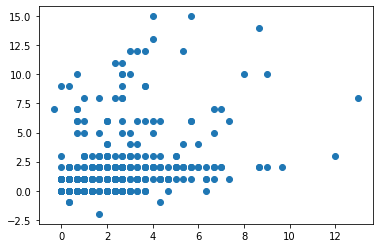

In [36]:
plt.scatter(x='previous_3_week_av',y='current',data=df_final)

In [36]:
# https://fantasy.premierleague.com/api/fixtures/
url_fixtures = 'https://fantasy.premierleague.com/api/fixtures/'
r_fixtures = requests.get(url_fixtures)
fixtures = r_fixtures.json()

In [37]:
fixtures[:30]

[{'code': 2292871,
  'event': None,
  'finished': False,
  'finished_provisional': False,
  'id': 61,
  'kickoff_time': None,
  'minutes': 0,
  'provisional_start_time': False,
  'started': None,
  'team_a': 8,
  'team_a_score': None,
  'team_h': 1,
  'team_h_score': None,
  'stats': [],
  'team_h_difficulty': 2,
  'team_a_difficulty': 4,
  'pulse_id': 74971},
 {'code': 2292921,
  'event': None,
  'finished': False,
  'finished_provisional': False,
  'id': 111,
  'kickoff_time': None,
  'minutes': 0,
  'provisional_start_time': False,
  'started': None,
  'team_a': 13,
  'team_a_score': None,
  'team_h': 1,
  'team_h_score': None,
  'stats': [],
  'team_h_difficulty': 5,
  'team_a_difficulty': 4,
  'pulse_id': 75021},
 {'code': 2292870,
  'event': None,
  'finished': False,
  'finished_provisional': False,
  'id': 62,
  'kickoff_time': None,
  'minutes': 0,
  'provisional_start_time': False,
  'started': None,
  'team_a': 5,
  'team_a_score': None,
  'team_h': 3,
  'team_h_score': None

In [369]:
games = [[i['team_h'], i['team_a'],i['event'],i['team_h_difficulty'],i['team_a_difficulty']] for i in fixtures]
games = pd.DataFrame(games,columns=['Home Team','Away Team','Game Week','Home Team Difficulty','Away Team Difficulty'])
games.head()

,Home Team,Away Team,Game Week,Home Team Difficulty,Away Team Difficulty
0,3,5,NaN,3,2
1,6,12,NaN,4,4
2,11,16,NaN,2,2
3,10,2,NaN,2,3
4,14,4,NaN,3,4


In [370]:
team_names = teams_df[['id','name']]

In [371]:
games_1 = pd.merge(games, team_names, left_on='Home Team', right_on='id', how='left')
games_2 = pd.merge(games_1, team_names, left_on='Away Team', right_on='id', how='left')
games_2 = games_2.rename({'name_x': 'Home Team Name', 'name_y': 'Away Team Name'}, axis=1)

In [372]:
def label_team (row, team):
    if row['Home Team Name'] != team :
        return row['Home Team Name'] + " (A)"
    return row['Away Team Name'] + " (H)"

def label_team_join (row, team):
    if row['Home Team Name'] != team :
        return row['Home Team Name']
    return row['Away Team Name']

def difficulty (row, team):
    if row['Home Team Name'] != team :
        return row['Home Team Difficulty'] - row['Away Team Difficulty']
    return row['Away Team Difficulty'] - row['Home Team Difficulty']

In [373]:
season_fixtures = pd.DataFrame(columns=['Team','Playing','Game Week','Challenge','playing_join'])

team_names_vec = team_names['name']

for i in team_names_vec:
    team = i
    team_fixtures = games_2[(games_2['Home Team Name'] == team) | (games_2['Away Team Name'] == team)]
    team_fixtures['Playing'] = team_fixtures.apply(lambda row: label_team(row, team), axis=1)
    team_fixtures['playing_join'] = team_fixtures.apply(lambda row: label_team_join(row, team), axis=1)
    team_fixtures['Challenge'] = team_fixtures.apply(lambda row: difficulty(row, team), axis=1)
    team_fixtures['Team'] = team
    loop_dat = team_fixtures[['Team', 'Playing', 'Game Week','Challenge','playing_join']]
    season_fixtures = pd.concat([season_fixtures, loop_dat])

In [374]:
pivot_fix = season_fixtures.pivot_table(index='Team',
                                        columns = 'Game Week',
                                        values='Playing',
                                        aggfunc=lambda x: ' '.join(x)).reset_index()

pivot_fix = pivot_fix.set_index("Team")

In [375]:
pivot_fix_diffi = season_fixtures.pivot_table(index='Team',
                                        columns = 'Game Week',
                                        values='Challenge').reset_index()

##### 

## League Table Construction

In [376]:
def goal_diff (row, team):
    if row['Home Team'] != team :
        return row['Away Goals'] - row['Home Goals']
    return row['Home Goals'] - row['Away Goals']

def goals_for (row, team):
    if row['Home Team'] != team :
        return row['Away Goals']
    return row['Home Goals']

def points (row):
    if row['Goal Diff'] > 0 :
        return 3
    elif row['Goal Diff'] == 0:
        return 1
    return 0

In [377]:
results = [[i['team_h'], i['team_a'],i['event'],i['team_h_score'],i['team_a_score']] for i in fixtures if i['started'] == True]
results = pd.DataFrame(results,columns=['Home Team','Away Team','Game Week','Home Goals','Away Goals'])
season_results = pd.DataFrame(columns=['Team','Game Week','Goals For','Goal Diff'])

for i in range(1,21,1):
    team = i
    team_results = results[(results['Home Team'] == team) | (results['Away Team'] == team)]
    if team_results.shape[0] == 0:
        continue
    team_results['Team'] = team
    team_results['Goal Diff'] = team_results.apply(lambda row: goal_diff(row, team), axis=1)
    team_results['Goals For'] = team_results.apply(lambda row: goals_for(row, team), axis=1)
    loop_dat = team_results[['Team', 'Game Week', 'Goals For','Goal Diff']]
    season_results = pd.concat([season_results, loop_dat])
    

season_results['Goals Against'] = season_results['Goals For'] - season_results['Goal Diff']
season_results['Points'] = season_results.apply(lambda row: points(row), axis=1)
season_results[["Goals For", "Goal Diff", 'Goals Against']] = season_results[["Goals For", "Goal Diff", 'Goals Against']].apply(pd.to_numeric)



In [409]:
season_results.head()

,Team,Game Week,Goals For,Goal Diff,Goals Against,Points
0,1,1,2,2,0,3
11,1,2,4,2,2,3
25,1,3,3,3,0,3
36,1,4,2,1,1,3
44,1,5,2,1,1,3


In [416]:
league_table = season_results.groupby(by=['Team']).sum()
league_table = pd.merge(league_table, team_names, left_on='Team', right_on='id', how='left')
league_table = league_table.rename({'name': 'Team'}, axis=1)
# league_table = league_table.set_index('Team')

league_table = league_table.sort_values(['Points', 'Goal Diff', 'Goals For'], ascending=[False, False, False])

In [417]:
league_table.head()

,Goals For,Goal Diff,Goals Against,Points,id,Team
12,59,36,23,51,13,Man City
0,47,26,21,51,1,Arsenal
13,38,10,28,46,14,Man Utd
14,35,22,13,41,15,Newcastle
17,42,7,35,39,18,Spurs


## Fixture Difficulty Construction

In [421]:
last_season_order = ['Man City','Liverpool','Chelsea', 'Spurs','Arsenal','Man Utd','West Ham','Leicester',
                    'Brighton','Wolves', 'Newcastle', 'Crystal Palace', 'Brentford', 'Aston Villa','Southampton',
                    'Everton','Leeds','Fulham','Bournemouth',"Nott'm Forest"]
team_diff_last_season = pd.DataFrame({'Team':last_season_order,'Last Season Diff':range(1,21,1)})

team_diff_curr_season = pd.DataFrame({'Team_id':league_table.id,'Current Season Diff': range(1,21,1)
                                      , 'team_name':league_table.Team})

# team_diff_table = team_diff_last_season.merge(team_diff_curr_season, on='Team')

In [422]:
team_diff_curr_season

,Team_id,Current Season Diff,team_name
12,13,1,Man City
0,1,2,Arsenal
13,14,3,Man Utd
14,15,4,Newcastle
17,18,5,Spurs
4,5,6,Brighton
8,9,7,Fulham
3,4,8,Brentford
11,12,9,Liverpool
5,6,10,Chelsea


In [71]:
gameweek_gone = 13
next_6 = gameweek_gone + 6
select = [0] + list(range(gameweek_gone, next_6 + 1,1))

season_diff = season_fixtures.merge(team_diff_table, left_on='playing_join', right_on='Team')

next_6_fixtures = pivot_fix_diffi.iloc[:,select]
next_6_fixtures['Total'] = next_6_fixtures.sum(axis=1,numeric_only=True)
next_6_fixtures['Average'] = next_6_fixtures['Total'] / (next_6 - gameweek_gone)

pivot_fix_diffi_tables_last = season_diff.pivot_table(index='Team_x',
                                        columns = 'Game Week',
                                        values=['Last Season Diff']).reset_index()
pivot_fix_diffi_tables_curr = season_diff.pivot_table(index='Team_x',
                                        columns = 'Game Week',
                                        values=['Current Season Diff']).reset_index()

next_6_fix_last = pivot_fix_diffi_tables_last.iloc[:,select]
next_6_fix_last['Total'] = next_6_fix_last.sum(axis=1,numeric_only=True)
next_6_fix_last['Average'] = next_6_fix_last['Total'] / (next_6 - gameweek_gone)
next_6_fix_last = next_6_fix_last.rename({'Team_x':'Team'},axis=1)
next_6_fix_last_merge = next_6_fix_last[['Team','Average']].droplevel(1, axis=1)

next_6_fix_curr = pivot_fix_diffi_tables_curr.iloc[:,select]
next_6_fix_curr['Total'] = next_6_fix_curr.sum(axis=1,numeric_only=True)
next_6_fix_curr['Average'] = next_6_fix_curr['Total'] / (next_6 - gameweek_gone)
next_6_fix_curr = next_6_fix_curr.rename({'Team_x':'Team'},axis=1)
next_6_fix_curr_merge = next_6_fix_curr[['Team','Average']].droplevel(1, axis=1)

upcoming_diff = next_6_fixtures.merge(next_6_fix_curr_merge, on = 'Team',suffixes=[' Diff Score',' Curr Table'])
upcoming_diff = upcoming_diff.merge(next_6_fix_last_merge, on = 'Team')
upcoming_diff = upcoming_diff[['Team','Average Diff Score', 'Average Curr Table', 'Average']].rename({'Average':'Average Last Table'}, axis=1)

In [72]:
weight_last = 0
weight_curr = 1

upcoming_diff['Average Table'] = (weight_last * upcoming_diff['Average Last Table']) + (weight_curr * upcoming_diff['Average Curr Table'])
upcoming_diff.sort_values(by='Average Table', ascending=False)
                                  

,Team,Average Diff Score,Average Curr Table,Average Last Table,Average Table
11,Liverpool,2.166667,14.833333,13.333333,14.833333
13,Man Utd,1.333333,14.500000,14.833333,14.500000
18,West Ham,-0.166667,14.166667,11.833333,14.166667
7,Everton,-0.666667,14.000000,13.333333,14.000000
17,Spurs,1.000000,13.333333,13.666667,13.333333
14,Newcastle,0.666667,13.166667,13.333333,13.166667
3,Brentford,-0.500000,12.666667,10.500000,12.666667
4,Brighton,0.500000,12.666667,10.833333,12.666667
12,Man City,2.833333,12.666667,13.500000,12.666667
6,Crystal Palace,-0.166667,12.500000,14.333333,12.500000


In [73]:
league_table[['Goals For', 'Goals Against', 'Goal Diff', 'Points']]

,Goals For,Goals Against,Goal Diff,Points
Team,,,,
Arsenal,25,11,14,28
Man City,36,11,25,26
Spurs,23,14,9,23
Newcastle,20,10,10,21
Chelsea,16,11,5,21
Man Utd,16,16,0,20
Fulham,22,22,0,18
Liverpool,22,13,9,16
Brighton,15,14,1,15


In [74]:
next_6_fixtures.sort_values(by=['Average'], ascending=False)

Game Week,Team,14.0,15.0,16.0,17.0,18.0,19.0,20.0,Total,Average
12,Man City,3.0,3.0,3.0,3.0,3.0,1.0,1.0,17.0,2.833333
11,Liverpool,3.0,0.0,3.0,2.0,3.0,1.0,1.0,13.0,2.166667
13,Man Utd,2.0,1.0,1.0,2.0,1.0,2.0,-1.0,8.0,1.333333
17,Spurs,1.0,0.0,2.0,0.0,2.0,0.0,1.0,6.0,1.000000
5,Chelsea,0.0,1.0,0.0,2.0,1.0,-1.0,2.0,5.0,0.833333
0,Arsenal,2.0,-1.0,1.0,2.0,0.0,1.0,-1.0,4.0,0.666667
14,Newcastle,1.0,1.0,0.0,1.0,1.0,-1.0,1.0,4.0,0.666667
4,Brighton,0.0,1.0,1.0,1.0,0.0,1.0,-1.0,3.0,0.500000
18,West Ham,-2.0,1.0,1.0,-2.0,1.0,0.0,0.0,-1.0,-0.166667
6,Crystal Palace,1.0,-1.0,0.0,1.0,0.0,0.0,-2.0,-1.0,-0.166667


In [75]:
next_6_fix_last.sort_values(by='Average', ascending=False)

Team Last Season Diff                                \
Game Week                             14.0  15.0  16.0  17.0  18.0  19.0   
13                Man Utd              7.0  14.0  18.0  20.0  10.0  19.0   
16            Southampton             12.0  11.0   2.0   9.0  18.0  20.0   
6          Crystal Palace             15.0   7.0  20.0  18.0  19.0   4.0   
17                  Spurs             19.0   2.0  17.0  13.0  14.0  12.0   
12               Man City              8.0  18.0  13.0  17.0  16.0   3.0   
7                 Everton             18.0   8.0  19.0  10.0   1.0   9.0   
14              Newcastle             14.0  15.0   3.0   8.0  17.0   5.0   
11              Liverpool             17.0   4.0  15.0  14.0   8.0  13.0   
5                 Chelsea              9.0   5.0  11.0  19.0  20.0   1.0   
10              Leicester              1.0  16.0   7.0  11.0   2.0  18.0   
2             Bournemouth              4.0  17.0  16.0   3.0  12.0   6.0   
18               West Ham              6.0  12.0   8.0   5.0  13.0  17.0   
19                 Wolves             13.0   9.0   5.0  16.0   6.0  14.0   
8                  Fulham             16.0   1.0   6.0  12.0  15.0   8.0   
4                Brighton              3.0  10.0  14.0  15.0   5.0  16.0   
0                 Arsenal             20.0   3.0  10.0   7.0   9.0  11.0   
3               Brentford             10.0  20.0   1.0   4.0   7.0   2.0   
15          Nott'm Forest              5.0  13.0  12.0   6.0   3.0  15.0   
1             Aston Villa             11.0   6.0   9.0   2.0   4.0  10.0   
9                   Leeds              2.0  19.0   4.0   1.0  11.0   7.0   

                Total    Average  
Game Week  20.0                   
13          1.0  89.0  14.833333  
16         16.0  88.0  14.666667  
6           3.0  86.0  14.333333  
17          5.0  82.0  13.666667  
12          6.0  81.0  13.500000  
7          15.0  80.0  13.333333  
14         18.0  80.0  13.333333  
11          9.0  80.0  13.333333  
5          12.0  77.0  12.833333  
10         20.0  75.0  12.500000  
2          13.0  71.0  11.833333  
18         10.0  71.0  11.833333  
19          7.0  70.0  11.666667  
8          11.0  69.0  11.500000  
4           2.0  65.0  10.833333  
0           4.0  64.0  10.666667  
3          19.0  63.0  10.500000  
15          8.0  62.0  10.333333  
1          17.0  59.0   9.833333  
9          14.0  58.0   9.666667

In [76]:
next_6_fix_curr.sort_values(by='Average', ascending=False)

Team Current Season Diff                                \
Game Week                                14.0  15.0  16.0  17.0  18.0  19.0   
11              Liverpool                18.0   3.0  16.0  15.0  17.0  11.0   
13                Man Utd                10.0  15.0   7.0  20.0  19.0  14.0   
18               West Ham                 6.0  13.0  17.0   1.0  11.0  18.0   
7                 Everton                 7.0  17.0  14.0  19.0   2.0   9.0   
17                  Spurs                14.0   8.0  18.0  11.0  15.0  13.0   
14              Newcastle                15.0  16.0   5.0  17.0  18.0   1.0   
3               Brentford                19.0  20.0   2.0   3.0  10.0   8.0   
4                Brighton                 5.0  19.0  15.0  16.0   1.0  12.0   
12               Man City                17.0   7.0  11.0  18.0  12.0   5.0   
6          Crystal Palace                16.0  10.0  20.0   7.0  14.0   3.0   
16            Southampton                13.0   4.0   8.0   9.0   7.0  20.0   
0                 Arsenal                20.0   5.0  19.0  10.0   9.0   4.0   
8                  Fulham                12.0   2.0   6.0  13.0  16.0  17.0   
15          Nott'm Forest                 1.0  11.0  13.0   6.0   5.0  16.0   
2             Bournemouth                 3.0  18.0  12.0   5.0  13.0   6.0   
1             Aston Villa                 4.0   6.0   9.0   8.0   3.0  19.0   
19                 Wolves                11.0   9.0   1.0  12.0   6.0  15.0   
5                 Chelsea                 9.0   1.0   4.0  14.0  20.0   2.0   
10              Leicester                 2.0  12.0  10.0   4.0   8.0   7.0   
9                   Leeds                 8.0  14.0   3.0   2.0   4.0  10.0   

                Total    Average  
Game Week  20.0                   
11          9.0  89.0  14.833333  
13          2.0  87.0  14.500000  
18         19.0  85.0  14.166667  
7          16.0  84.0  14.000000  
17          1.0  80.0  13.333333  
14          7.0  79.0  13.166667  
3          14.0  76.0  12.666667  
4           8.0  76.0  12.666667  
12          6.0  76.0  12.666667  
6           5.0  75.0  12.500000  
16         12.0  73.0  12.166667  
0           3.0  70.0  11.666667  
8           4.0  70.0  11.666667  
15         17.0  69.0  11.500000  
2          11.0  68.0  11.333333  
1          18.0  67.0  11.166667  
19         10.0  64.0  10.666667  
5          13.0  63.0  10.500000  
10         20.0  63.0  10.500000  
9          15.0  56.0   9.333333

In [77]:
easy_order = upcoming_diff.sort_values(by=['Average Table'], ascending=False).iloc[:,0]
pivot_fix.loc[easy_order,14:38]

Game Week,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0
Team,,,,,,,,,,,,,,,,,,,,,,,,,
Liverpool,Leeds (H),Spurs (A),Southampton (H),Aston Villa (A),Leicester (H),Brentford (A),Brighton (A),Chelsea (H),Wolves (A),Everton (H),Newcastle (A),Crystal Palace (A),Man Utd (H),Bournemouth (A),Fulham (H),Man City (A),Arsenal (H),Leeds (A),Nott'm Forest (H),West Ham (A),Spurs (H),Brentford (H),Leicester (A),Aston Villa (H),Southampton (A)
Man Utd,West Ham (H),Aston Villa (A),Fulham (A),Nott'm Forest (H),Wolves (A),Bournemouth (H),Man City (H),Arsenal (A),Crystal Palace (H),Leeds (A),Leicester (H),Brentford (H),Liverpool (A),Southampton (H),Brighton (A),Newcastle (A),Everton (H),Nott'm Forest (A),Chelsea (H),Spurs (A),Aston Villa (H),West Ham (A),Wolves (H),Bournemouth (A),Fulham (H)
West Ham,Man Utd (A),Crystal Palace (H),Leicester (H),Arsenal (A),Brentford (H),Leeds (A),Wolves (A),Everton (H),Newcastle (A),Chelsea (H),Spurs (A),Nott'm Forest (H),Brighton (A),Aston Villa (H),Man City (A),Southampton (H),Fulham (A),Arsenal (H),Bournemouth (A),Liverpool (H),Crystal Palace (A),Man Utd (H),Brentford (A),Leeds (H),Leicester (A)
Everton,Fulham (A),Leicester (H),Bournemouth (A),Wolves (H),Man City (A),Brighton (H),Southampton (H),West Ham (A),Arsenal (H),Liverpool (A),Leeds (H),Aston Villa (H),Nott'm Forest (A),Brentford (H),Chelsea (A),Spurs (H),Man Utd (A),Fulham (H),Crystal Palace (A),Newcastle (H),Leicester (A),Brighton (A),Man City (H),Wolves (A),Bournemouth (H)
Spurs,Bournemouth (A),Liverpool (H),Leeds (H),Brentford (A),Aston Villa (H),Crystal Palace (A),Arsenal (H),Fulham (A),Man City (H),Leicester (A),West Ham (H),Chelsea (H),Wolves (A),Nott'm Forest (H),Southampton (A),Everton (A),Brighton (H),Bournemouth (H),Newcastle (A),Man Utd (H),Liverpool (A),Crystal Palace (H),Aston Villa (A),Brentford (H),Leeds (A)
Newcastle,Aston Villa (H),Southampton (A),Chelsea (H),Leicester (A),Leeds (H),Arsenal (A),Fulham (H),Crystal Palace (A),West Ham (H),Bournemouth (A),Liverpool (H),Brighton (H),Man City (A),Wolves (H),Nott'm Forest (A),Man Utd (H),Brentford (A),Aston Villa (A),Spurs (H),Everton (A),Southampton (H),Arsenal (H),Leeds (A),Leicester (H),Chelsea (A)
Brentford,Wolves (H),Nott'm Forest (A),Man City (A),Spurs (H),West Ham (A),Liverpool (H),Bournemouth (H),Leeds (A),Southampton (H),Arsenal (A),Crystal Palace (H),Man Utd (A),Fulham (H),Everton (A),Leicester (H),Brighton (A),Newcastle (H),Wolves (A),Aston Villa (H),Chelsea (A),Nott'm Forest (H),Liverpool (A),West Ham (H),Spurs (A),Man City (H)
Brighton,Chelsea (H),Wolves (A),Aston Villa (H),Southampton (A),Arsenal (H),Everton (A),Liverpool (H),Leicester (A),Bournemouth (H),Crystal Palace (A),Fulham (H),Newcastle (A),West Ham (H),Leeds (A),Man Utd (H),Brentford (H),Spurs (A),Chelsea (A),Man City (H),Nott'm Forest (A),Wolves (H),Everton (H),Arsenal (A),Southampton (H),Aston Villa (A)
Man City,Leicester (A),Fulham (H),Brentford (H),Leeds (A),Everton (H),Chelsea (A),Man Utd (A),Wolves (H),Spurs (A),Aston Villa (H),Nott'm Forest (A),Bournemouth (A),Newcastle (H),Crystal Palace (A),West Ham (H),Liverpool (H),Southampton (A),Leicester (H),Brighton (A),Arsenal (H),Fulham (A),Leeds (H),Everton (A),Chelsea (H),Brentford (A)


## ML Modelling

In [53]:
elements_df.columns

Index(['chance_of_playing_next_round', 'chance_of_playing_this_round', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'dreamteam_count', 'element_type', 'ep_next',
       'ep_this', 'event_points', 'first_name', 'form', 'id', 'in_dreamteam',
       'news', 'news_added', 'now_cost', 'photo', 'points_per_game',
       'second_name', 'selected_by_percent', 'special', 'squad_number',
       'status', 'team', 'team_code', 'total_points', 'transfers_in',
       'transfers_in_event', 'transfers_out', 'transfers_out_event',
       'value_form', 'value_season', 'web_name', 'minutes', 'goals_scored',
       'assists', 'clean_sheets', 'goals_conceded', 'own_goals',
       'penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards',
       'saves', 'bonus', 'bps', 'influence', 'creativity', 'threat',
       'ict_index', 'influence_rank', 'influence_rank_type', 'creativity_rank',
       'creativity_rank_type', 'threat_rank'

In [135]:
player_vars = elements_df[['id','first_name','second_name','team','dreamteam_count','total_points','form','minutes'
                           ,'goals_scored','assists','clean_sheets','goals_conceded','own_goals','penalties_saved'
                           ,'penalties_missed', 'yellow_cards','red_cards','saves','bonus', 'bps', 'influence', 'creativity'
                           ,'threat','element_type']]
player_vars['position'] = player_vars.element_type.map(elements_types_df.set_index('id').singular_name)
player_vars['team_name'] = player_vars.team.map(teams_df.set_index('id').name)
player_vars = player_vars.reset_index()
player_vars['id_join'] = player_vars['index'] + 1
player_vars.head()

,index,id,first_name,second_name,team,dreamteam_count,total_points,form,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,element_type,position,team_name,id_join
0,0,1,Cédric,Alves Soares,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2,Defender,Arsenal,1
1,1,3,Granit,Xhaka,1,1,26,4.3,537,1,2,2,7,0,0,0,1,0,0,2,113,118.0,124.5,56.0,3,Midfielder,Arsenal,2
2,2,4,Mohamed,Elneny,1,0,2,0.3,90,0,0,0,1,0,0,0,0,0,0,0,15,4.2,3.8,0.0,3,Midfielder,Arsenal,3
3,3,5,Rob,Holding,1,0,2,0.3,3,0,0,0,0,0,0,0,0,0,0,0,8,2.2,0.0,0.0,2,Defender,Arsenal,4
4,4,6,Thomas,Partey,1,0,8,1.3,270,0,0,2,2,0,0,0,0,0,0,0,39,41.2,21.5,49.0,3,Midfielder,Arsenal,5


In [127]:
fixtures_so_far = season_fixtures[season_fixtures['Game Week'] <= gameweek_gone]

player_fix_so_far = fixtures_so_far.merge(player_vars, left_on = "Team", right_on = "team_name")
player_fix_so_far.head()

,Team,Playing,Game Week,Challenge,playing_join,id,first_name,second_name,team,dreamteam_count,total_points,form,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,element_type,position,team_name


In [150]:
url_gameweek = 'https://fantasy.premierleague.com/api/event/'+str(k)+'/live/'
r = requests.get(url_gameweek)
data = r.json()
stats = [data['elements'][i]['stats'] for i in range(len(data['elements']))]
stats = pd.DataFrame(stats).reset_index()
stats['id'] = stats['index']

stats.head()

,index,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,total_points,in_dreamteam,id
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,False,0
1,1,90,0,0,0,2,0,0,0,0,0,8,0,25,57.6,0.0,0.0,5.8,3,False,1
2,2,90,0,0,0,3,0,0,0,0,0,0,0,18,15.2,14.9,46.0,7.6,2,False,2
3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,False,3
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,False,4


In [99]:
last_fin_gameweek = 6
gameweeks = [x + 1 for x in list(range(last_fin_gameweek))]

df = {}
for j,k in enumerate(gameweeks):
        url_gameweek = 'https://fantasy.premierleague.com/api/event/'+str(k)+'/live/'
        r = requests.get(url_gameweek)
        data = r.json()
        stats = [data['elements'][i]['stats'] for i in range(len(data['elements']))]
        stats = pd.DataFrame(stats).reset_index()
        stats['id'] = stats['index']
        stats = stats[['id','total_points','goals_scored','assists'
                      ,'clean_sheets', 'goals_conceded','own_goals','penalties_saved'
                      ,'penalties_missed', 'yellow_cards','red_cards','saves'
                      ,'bonus']]
        stats = stats.set_index('id')
        stats['gameweek'] = k
        df[j] = stats

In [100]:
stats

,total_points,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,gameweek
id,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,0,0,6
1,3,0,0,0,2,0,0,0,0,0,8,0,6
2,2,0,0,0,3,0,0,0,0,0,0,0,6
3,0,0,0,0,0,0,0,0,0,0,0,0,6
4,0,0,0,0,0,0,0,0,0,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,0,0,0,0,0,0,0,0,0,0,0,0,6
620,0,0,0,0,0,0,0,0,0,0,0,0,6
621,0,0,0,0,0,0,0,0,0,0,0,0,6


In [101]:
points_data_upg = pd.concat(df.values(), ignore_index=False)
points_data_upg

,total_points,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,gameweek
id,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2,0,0,1,0,0,0,0,1,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,0,0,0,0,0,0,0,0,0,0,0,0,6
620,0,0,0,0,0,0,0,0,0,0,0,0,6
621,0,0,0,0,0,0,0,0,0,0,0,0,6


In [108]:
points_data = pd.concat(df.values(), ignore_index=False)
points_data = points_data.pivot_table(index='id', columns = 'gameweek', values=['total_points'])
points_data['surname'] = df_final.id.map(elements_df.set_index('id').second_name)
points_data['forname'] = df_final.id.map(elements_df.set_index('id').first_name)
points_data['position'] = df_final.id.map(slim_elements_df.set_index('id').position)
points_data['team'] = df_final.id.map(slim_elements_df.set_index('id').team_name)
points_data.columns = list(points_data.columns.get_level_values(0))
points_data['three_week_average'] = points_data.iloc[:,-7:-4].mean(axis=1)
points_data['six_week_average'] = points_data.iloc[:,-11:-5].mean(axis=1)
points_data['three_weeks_abv_6'] = (points_data.iloc[:,-9:-6]>6).sum(axis=1)
points_data['six_weeks_abv_6'] = (points_data.iloc[:,-13:-7]>6).sum(axis=1)
points_data['three_weeks_std'] = points_data.iloc[:,-11:-8].std(axis=1, skipna=True)
points_data['six_weeks_std'] = points_data.iloc[:,-15:-9].std(axis=1, skipna=True)
points_data = points_data.reset_index()

In [109]:
points_data.sort_values(by='id')

,id,total_points,total_points,total_points,total_points,total_points,total_points,surname,forname,position,team,three_week_average,six_week_average,three_weeks_abv_6,six_weeks_abv_6,three_weeks_std,six_weeks_std
0,0,0.0,0.0,0.0,0.0,0.0,0.0,Alves Soares,Cédric,NaN,NaN,0.000000,0.000000,0,0,0.000000,0.000000
1,1,0.0,0.0,2.0,3.0,2.0,3.0,Leno,Bernd,Goalkeeper,Fulham,2.666667,1.666667,0,0,0.577350,1.366260
2,2,2.0,12.0,6.0,2.0,2.0,2.0,Xhaka,Granit,Midfielder,Arsenal,2.000000,4.333333,0,1,0.000000,4.082483
3,3,0.0,0.0,0.0,2.0,0.0,0.0,Elneny,Mohamed,Midfielder,Arsenal,0.666667,0.333333,0,0,1.154701,0.816497
4,4,0.0,0.0,0.0,1.0,1.0,0.0,Holding,Rob,Defender,Arsenal,0.666667,0.333333,0,0,0.577350,0.516398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,619,NaN,NaN,NaN,NaN,NaN,0.0,Ramos de Oliveira Melo,Arthur Henrique,NaN,NaN,0.000000,0.000000,0,0,NaN,NaN
620,620,NaN,NaN,NaN,NaN,NaN,0.0,Badé,Loïc,NaN,NaN,0.000000,0.000000,0,0,NaN,NaN
621,621,NaN,NaN,NaN,NaN,NaN,0.0,Larios López,Juan,Defender,Southampton,0.000000,0.000000,0,0,NaN,NaN
622,622,NaN,NaN,NaN,NaN,NaN,0.0,Caleta-Car,Duje,Defender,Southampton,0.000000,0.000000,0,0,NaN,NaN


In [110]:
gameweek_gone = 0
next_6 = gameweek_gone + 6
select = [0] + list(range(gameweek_gone + 1, next_6 + 1,1))

season_diff = season_fixtures.merge(team_diff_table, left_on='playing_join', right_on='Team')

next_6_fixtures = pivot_fix_diffi.iloc[:,select]
next_6_fixtures['Total'] = next_6_fixtures.sum(axis=1,numeric_only=True)
next_6_fixtures['Average'] = next_6_fixtures['Total'] / (next_6 - gameweek_gone)

pivot_fix_diffi_tables_last = season_diff.pivot_table(index='Team_x',
                                        columns = 'Game Week',
                                        values=['Last Season Diff']).reset_index()
pivot_fix_diffi_tables_curr = season_diff.pivot_table(index='Team_x',
                                        columns = 'Game Week',
                                        values=['Current Season Diff']).reset_index()

next_6_fix_last = pivot_fix_diffi_tables_last.iloc[:,select]
next_6_fix_last['Total'] = next_6_fix_last.sum(axis=1,numeric_only=True)
next_6_fix_last['Average'] = next_6_fix_last['Total'] / (next_6 - gameweek_gone)
next_6_fix_last = next_6_fix_last.rename({'Team_x':'Team'},axis=1)
next_6_fix_last_merge = next_6_fix_last[['Team','Average']].droplevel(1, axis=1)

next_6_fix_curr = pivot_fix_diffi_tables_curr.iloc[:,select]
next_6_fix_curr['Total'] = next_6_fix_curr.sum(axis=1,numeric_only=True)
next_6_fix_curr['Average'] = next_6_fix_curr['Total'] / (next_6 - gameweek_gone)
next_6_fix_curr = next_6_fix_curr.rename({'Team_x':'Team'},axis=1)
next_6_fix_curr_merge = next_6_fix_curr[['Team','Average']].droplevel(1, axis=1)

upcoming_diff = next_6_fixtures.merge(next_6_fix_curr_merge, on = 'Team',suffixes=[' Diff Score',' Curr Table'])
upcoming_diff = upcoming_diff.merge(next_6_fix_last_merge, on = 'Team')
upcoming_diff = upcoming_diff[['Team','Average Diff Score', 'Average Curr Table', 'Average']].rename({'Average':'Average Last Table'}, axis=1)

In [111]:
weight_last = 0.1
weight_curr = 0.9

upcoming_diff['Average Table'] = (weight_last * upcoming_diff['Average Last Table']) + (weight_curr * upcoming_diff['Average Curr Table'])
upcoming_diff.sort_values(by='Average Table', ascending=False)

,Team,Average Diff Score,Average Curr Table,Average Last Table,Average Table
12,Man City,2.666667,14.333333,13.833333,14.283333
17,Spurs,1.000000,13.666667,12.166667,13.516667
0,Arsenal,1.000000,12.833333,12.833333,12.833333
5,Chelsea,1.333333,12.666667,11.166667,12.516667
3,Brentford,0.166667,12.166667,12.833333,12.233333
7,Everton,-0.666667,11.666667,11.500000,11.650000
14,Newcastle,-0.166667,11.666667,9.000000,11.400000
4,Brighton,0.333333,11.166667,11.166667,11.166667
9,Leeds,-0.500000,10.666667,11.000000,10.700000
11,Liverpool,2.000000,10.333333,13.666667,10.666667


In [112]:
diff_avg = upcoming_diff[['Team','Average Table']] 

points_diff = points_data.merge(diff_avg, left_on='team', right_on='Team')
points_diff['six_week_avg_diff'] = points_diff['six_week_average'] / points_diff['Average Table']
points_diff.sort_values(by='id').head(20)

,id,total_points,total_points,total_points,total_points,total_points,total_points,surname,forname,position,team,three_week_average,six_week_average,three_weeks_abv_6,six_weeks_abv_6,three_weeks_std,six_weeks_std,Team,Average Table,six_week_avg_diff
0,1,0.0,0.0,2.0,3.0,2.0,3.0,Leno,Bernd,Goalkeeper,Fulham,2.666667,1.666667,0,0,0.577350,1.366260,Fulham,7.466667,0.223214
22,2,2.0,12.0,6.0,2.0,2.0,2.0,Xhaka,Granit,Midfielder,Arsenal,2.000000,4.333333,0,1,0.000000,4.082483,Arsenal,12.833333,0.337662
23,3,0.0,0.0,0.0,2.0,0.0,0.0,Elneny,Mohamed,Midfielder,Arsenal,0.666667,0.333333,0,0,1.154701,0.816497,Arsenal,12.833333,0.025974
24,4,0.0,0.0,0.0,1.0,1.0,0.0,Holding,Rob,Defender,Arsenal,0.666667,0.333333,0,0,0.577350,0.516398,Arsenal,12.833333,0.025974
25,5,3.0,2.0,3.0,0.0,0.0,0.0,Partey,Thomas,Midfielder,Arsenal,0.000000,1.333333,0,0,0.000000,1.505545,Arsenal,12.833333,0.103896
26,6,3.0,2.0,16.0,10.0,1.0,2.0,Ødegaard,Martin,Midfielder,Arsenal,4.333333,5.666667,1,2,4.932883,6.022181,Arsenal,12.833333,0.441558
27,7,1.0,1.0,1.0,2.0,2.0,0.0,Tierney,Kieran,Defender,Arsenal,1.333333,1.166667,0,0,1.154701,0.752773,Arsenal,12.833333,0.090909
28,9,5.0,1.0,7.0,1.0,8.0,1.0,White,Benjamin,Defender,Arsenal,3.333333,3.833333,1,2,4.041452,3.250641,Arsenal,12.833333,0.298701
29,10,1.0,1.0,1.0,1.0,1.0,1.0,Nketiah,Eddie,Forward,Arsenal,1.000000,1.000000,0,0,0.000000,0.000000,Arsenal,12.833333,0.077922
30,11,0.0,1.0,1.0,0.0,1.0,1.0,Smith Rowe,Emile,Midfielder,Arsenal,0.666667,0.666667,0,0,0.577350,0.516398,Arsenal,12.833333,0.051948


In [113]:
training_data = points_diff.merge(player_vars, left_on=["forname","surname"], right_on=["first_name","second_name"]).sort_values(by='id_x')
training_data

NameError: name 'player_vars' is not defined

In [114]:
variables_of_interest = training_data[['position_x'
                                      ,'three_week_average','six_week_average'
                                      ,'three_weeks_abv_6','six_weeks_abv_6'
                                      ,'three_weeks_std','six_weeks_std'
                                      ,'Average Table', 'dreamteam_count'
                                      ,'bps','influence','creativity','threat']]
variables_of_interest.head()

NameError: name 'training_data' is not defined

### Model Specifications

Does everything need to be compared to quality of the opposition faced? Most likely.

----

Goalkeepers - in last 6 weeks
Opposition in a given week
* Average goals scored by opposition in the last 6 weeks compared to quality of opposition faced
* Times above 2 goals

Quality of the player
* Saves
* Goals conceded
* Clean Sheets
* Bonus points
* Average points scored over previous weeks / form
* Dummies for top teams or something like that
* Cost of player
* 


-----------------------------------
----
Defenders - in last 6 weeks
Opposition in a given week
* Average goals scored by opposition in the last 6 weeks compared to quality of opposition faced
* Times above 2 goals

Quality of the player
* Goals
* Assists
* Clean Sheets
* Creativity etc
* bonus points

--------
--------

Midfielders - in last 6 weeks
Opposition in a given week
* Average goals conceded by opposition in the last 6 weeks compared to quality of opposition faced
* Times conceded more than 2 goals versus quality of opposition

Quality of the player
* Goals
* Assists
* Clean Sheets
* Creativity etc
* bonus points

-----
----

Forwards - in last 6 weeks
Opposition in a given week
* Average goals conceded by opposition in the last 6 weeks compared to quality of opposition faced
* Times conceded more than 2 goals versus quality of opposition


Quality of the player
* Goals
* Assists
* Creativity etc
* bonus points

